##PİSİRME MESAFESİ TAKIMI##



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/balanced_sample.csv")

In [ ]:
df.head()

,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-28 22:01:00,12,70.52,57.21,41.55,3.20,2.55,2,0,422,Overheating,0.0,1
1,2025-01-18 19:09:00,27,70.47,30.81,56.76,1.16,2.74,2,0,153,Electrical Fault,0.0,1
2,2025-02-11 16:36:00,15,77.40,67.63,56.04,3.97,2.83,2,0,76,Vibration Issue,0.0,1
3,2025-02-25 11:10:00,4,78.15,41.90,49.71,4.36,2.38,1,0,275,Normal,0.0,0
4,2025-03-05 20:21:00,23,61.11,33.66,73.22,3.32,3.17,2,0,15,Electrical Fault,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 1182 non-null   object 
 1   machine_id                1182 non-null   int64  
 2   temperature               1182 non-null   float64
 3   vibration                 1182 non-null   float64
 4   humidity                  1182 non-null   float64
 5   pressure                  1182 non-null   float64
 6   energy_consumption        1182 non-null   float64
 7   machine_status            1182 non-null   int64  
 8   anomaly_flag              1182 non-null   int64  
 9   predicted_remaining_life  1182 non-null   int64  
 10  failure_type              1182 non-null   object 
 11  downtime_risk             1182 non-null   float64
 12  maintenance_required      1182 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 120.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
machine_id,1182.0,26.211506,14.186347,1.00,14.0000,26.000,38.7500,50.00
temperature,1182.0,77.222479,11.196393,46.19,69.5925,76.410,85.2050,108.07
vibration,1182.0,51.154848,15.780467,6.96,40.3025,50.325,61.1775,98.86
humidity,1182.0,55.069002,14.456184,30.00,42.8600,54.795,67.3575,79.99
pressure,1182.0,2.971421,1.145589,1.01,1.9300,2.995,3.9675,4.99
energy_consumption,1182.0,2.736041,1.287416,0.51,1.6200,2.720,3.8400,5.00
machine_status,1182.0,1.177665,0.549567,0.00,1.0000,1.000,2.0000,2.00
anomaly_flag,1182.0,0.233503,0.423238,0.00,0.0000,0.000,0.0000,1.00
predicted_remaining_life,1182.0,191.200508,156.225167,1.00,39.0000,164.000,325.7500,499.00
downtime_risk,1182.0,0.233494,0.423223,0.00,0.0000,0.000,0.0000,1.00


In [ ]:
df.shape

(1182, 13)

#OBJECT türünde olan sütunlarımızı düzenleyelim

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.timestamp.head()

,timestamp
0,2025-01-28 22:01:00
1,2025-01-18 19:09:00
2,2025-02-11 16:36:00
3,2025-02-25 11:10:00
4,2025-03-05 20:21:00


#Kategorik veriler icin "One Hot Encoding" yapalım

In [ ]:
df["failure_type"].unique()

array(['Overheating', 'Electrical Fault', 'Vibration Issue', 'Normal',
       'Pressure Drop'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['failure_type'], prefix='failure')
df[df.filter(like='failure_').columns] = df.filter(like='failure_').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 1182 non-null   datetime64[ns]
 1   machine_id                1182 non-null   int64         
 2   temperature               1182 non-null   float64       
 3   vibration                 1182 non-null   float64       
 4   humidity                  1182 non-null   float64       
 5   pressure                  1182 non-null   float64       
 6   energy_consumption        1182 non-null   float64       
 7   machine_status            1182 non-null   int64         
 8   anomaly_flag              1182 non-null   int64         
 9   predicted_remaining_life  1182 non-null   int64         
 10  downtime_risk             1182 non-null   float64       
 11  maintenance_required      1182 non-null   int64         
 12  failure_Electrical F

# Eksik verimiz var mı

In [ ]:
df.isnull().sum().sum()

np.int64(0)

# Tekrarlanan verimiz var mı

In [ ]:
df.duplicated().sum()

np.int64(0)

# Hedef degiskenimiz dengeli mi

In [ ]:
df['maintenance_required'].value_counts(normalize=True) * 100

,proportion
maintenance_required,
1,50.0
0,50.0


# Aykırı değerlerimiz var mı

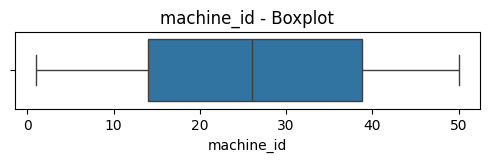

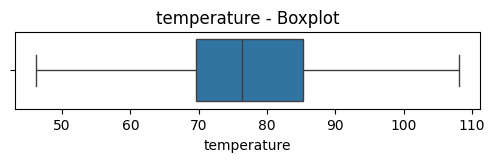

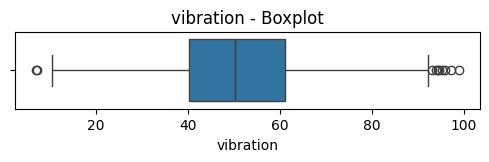

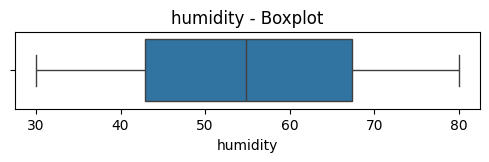

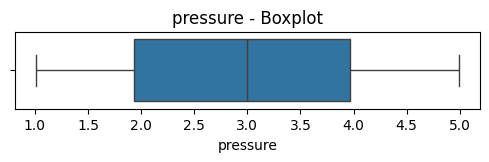

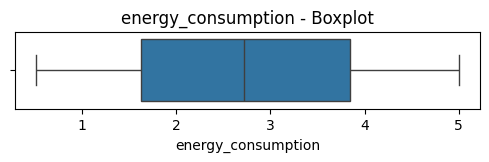

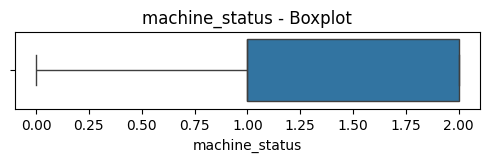

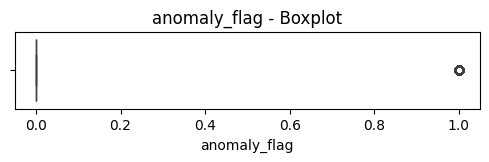

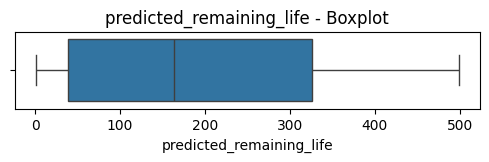

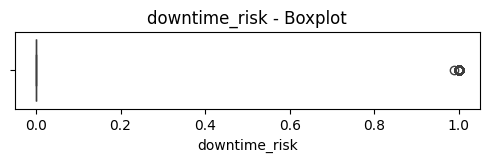

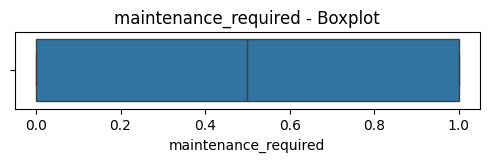

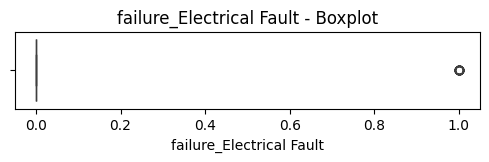

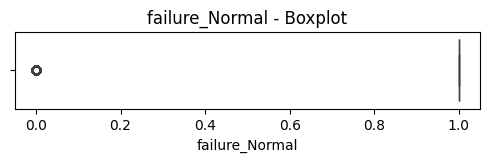

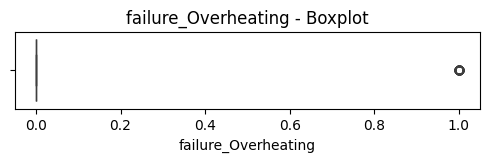

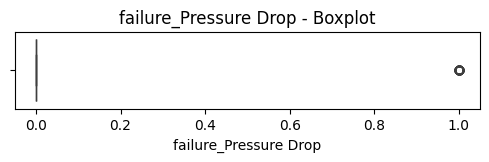

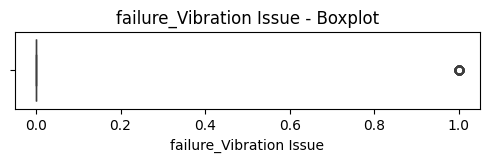

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

vibration sütunumuzda aykırı gözlem gozukuyor bunlardan kurtulmalıyız

In [ ]:
Q1 = df['vibration'].quantile(0.25)
Q3 = df['vibration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['vibration'] < lower_bound) | (df['vibration'] > upper_bound)]

print("Aykırı sayısı:", len(outliers))

print("Aykırı oranı: {:.2f}%".format(len(outliers) / len(df) * 100))

Aykırı sayısı: 10
Aykırı oranı: 0.85%


Aykırı değer oranımız çok küçük direkt veriden silebiliriz

In [ ]:
Q1 = df['vibration'].quantile(0.25)
Q3 = df['vibration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['vibration'] >= lower_bound) & (df['vibration'] <= upper_bound)]

print("Yeni veri seti satır sayısı:", len(df))

Yeni veri seti satır sayısı: 1172


In [ ]:
df.head()

,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,downtime_risk,maintenance_required,failure_Electrical Fault,failure_Normal,failure_Overheating,failure_Pressure Drop,failure_Vibration Issue
0,2025-01-28 22:01:00,12,70.52,57.21,41.55,3.20,2.55,2,0,422,0.0,1,0,0,1,0,0
1,2025-01-18 19:09:00,27,70.47,30.81,56.76,1.16,2.74,2,0,153,0.0,1,1,0,0,0,0
2,2025-02-11 16:36:00,15,77.40,67.63,56.04,3.97,2.83,2,0,76,0.0,1,0,0,0,0,1
3,2025-02-25 11:10:00,4,78.15,41.90,49.71,4.36,2.38,1,0,275,0.0,0,0,1,0,0,0
4,2025-03-05 20:21:00,23,61.11,33.66,73.22,3.32,3.17,2,0,15,0.0,1,1,0,0,0,0


# Degiskenler arasında yuksek korelasyon var mı

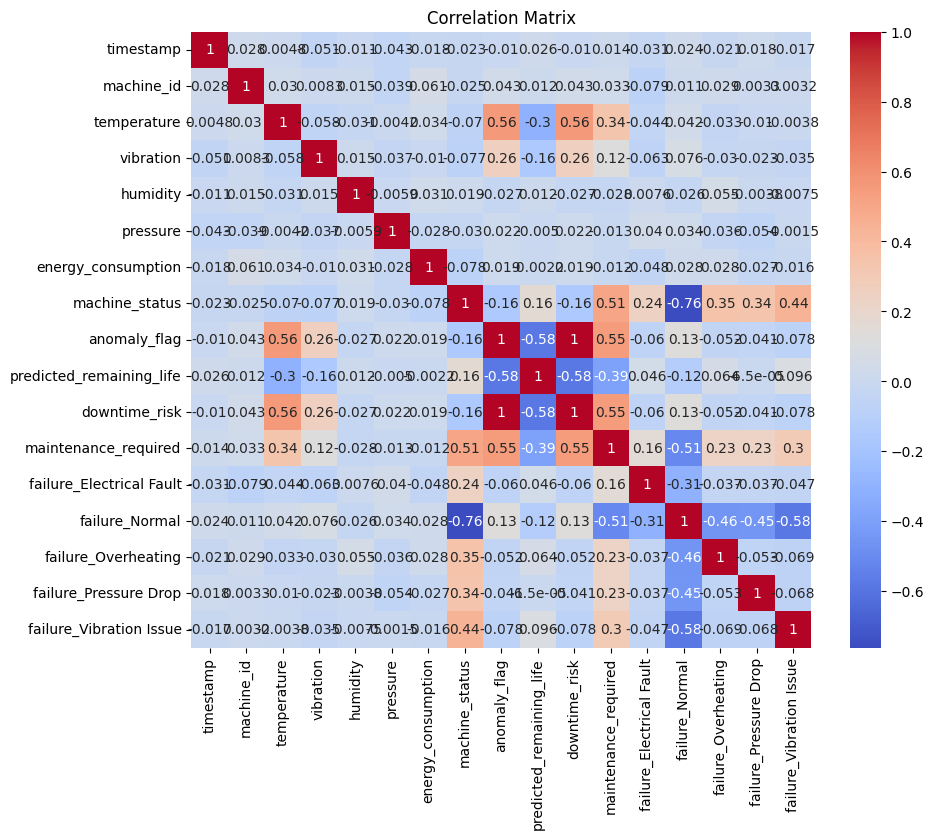

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Sızıntı Yaratabilecek Degiskenler Var mı


In [ ]:
corr_target = corr['maintenance_required'].sort_values(ascending=False)
print(corr_target)

maintenance_required        1.000000
downtime_risk               0.546885
anomaly_flag                0.546885
machine_status              0.511192
temperature                 0.335095
failure_Vibration Issue     0.297317
failure_Overheating         0.233877
failure_Pressure Drop       0.231816
failure_Electrical Fault    0.160376
vibration                   0.122864
machine_id                  0.033297
timestamp                   0.014136
energy_consumption         -0.012354
pressure                   -0.012912
humidity                   -0.028413
predicted_remaining_life   -0.391817
failure_Normal             -0.513607
Name: maintenance_required, dtype: float64


Burada one hot encoding uyguladığımız için failure kısımlarının korelasyonu 1 çıkmıyor. Ama yanıt değişkenini yüzde yüz açıkladığı için veri sızıntısı oluşturuyor. Model kurarken bu değerleri de atacağız.

#Modeli kuralım

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

x_full = df.drop(columns=['maintenance_required', 'timestamp'])
y = df['maintenance_required']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_full)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
print("Tüm sütunlarla:")
print(classification_report(y_test, model.predict(x_test)))

Tüm sütunlarla:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       118
           1       0.99      0.94      0.96       117

    accuracy                           0.97       235
   macro avg       0.97      0.97      0.97       235
weighted avg       0.97      0.97      0.97       235



downtime_risk, anomaly_flag, predicted_remaining_life gibi sızıntı riski yüksek sütunları çıkarıp tekrar modeli eğitelim. Veri sızıntısı var gibi

In [ ]:
leak_columns = ['anomaly_flag', 'predicted_remaining_life']
X_filtered = df.drop(columns=leak_columns + ['maintenance_required', 'timestamp'])
y = df['maintenance_required']

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       118
           1       1.00      0.92      0.96       117

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235



Aynı modeli K-Fold Cross Validation ile test edelim

In [ ]:
from sklearn.model_selection import cross_val_score

# Sızıntı riski olan sütunları çıkarıyoruz
leak_columns = ['downtime_risk', 'anomaly_flag', 'predicted_remaining_life']
X_filtered = df.drop(columns=leak_columns + ['maintenance_required', 'timestamp'])
y = df['maintenance_required']

model = LogisticRegression(max_iter=1000, random_state=42)

scores = cross_val_score(model, X_filtered, y, cv=5, scoring='f1')

print("F1 skorları (5 Fold):", scores)
print("Ortalama F1 skoru:", np.mean(scores))

F1 skorları (5 Fold): [0.81057269 0.84821429 0.8362069  0.83261803 0.81308411]
Ortalama F1 skoru: 0.828139201478257


Veri sızıntısı yaratabilecek tüm değişkenlerimizi atıp tekrar model kuralım

#Yeni modeller kurup nihai verimizi test edelim

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Sızıntı riski taşıyan sütunları çıkaratlım
drop_cols = [
    'downtime_risk',
    'predicted_remaining_life',
    'timestamp',
    'failure_Electrical Fault',
    'failure_Normal',
    'failure_Overheating',
    'failure_Pressure Drop',
    "machine_status",
    'failure_Vibration Issue'
]

X = df.drop(columns=drop_cols + ['maintenance_required'], errors='ignore')
y = df['maintenance_required']

rf_model = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_results = cross_validate(rf_model, X, y, cv=skf, scoring=scoring)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"{metric.upper()} - Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")

ACCURACY - Mean: 0.7065 | Std: 0.0310
PRECISION - Mean: 0.8325 | Std: 0.0560
RECALL - Mean: 0.5137 | Std: 0.0439
F1 - Mean: 0.6343 | Std: 0.0417
ROC_AUC - Mean: 0.7052 | Std: 0.0309


Veri sızıntısına sebep olabileceğini düşündüğümüz değişkenleri çıkardıktan sonra, Random forest için F1 İstatistiği ve Accuracy değerlerimiz yukarıdaki gibidir.



Çıkartma Nedenlerimiz:


Downtime risk veya Anomaly flag arasında seçim yapmamız gerekti çünkü multicolinearity'ye sebep oluyordu. Bu iki değişkenin kendi aralarındaki korelasyon 1.


Predicted Remaining Life değişkeni kendi başına başka sensör verilerine bağlı olduğu için çıkartıldı.


Machine status'de  aynı şekilde başka sensör verilerine bağlı olduğundan dolayı çıkartıldı.


failure type değişkeni de aynı şekilde sebebi diğer sensör verilerine bağlı olduğudnan dolayı çıkartıldı.

# Logistic Regression

In [ ]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
cv_results = cross_validate(logreg_model, X, y, cv=skf, scoring=scoring)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"LOGREG {metric.upper()} - Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")

LOGREG ACCURACY - Mean: 0.7303 | Std: 0.0331
LOGREG PRECISION - Mean: 0.9911 | Std: 0.0178
LOGREG RECALL - Mean: 0.4604 | Std: 0.0622
LOGREG F1 - Mean: 0.6266 | Std: 0.0609
LOGREG ROC_AUC - Mean: 0.7285 | Std: 0.0336


# Support Vector Machine (SVC)

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', probability=True, random_state=42)
cv_results = cross_validate(svc_model, X, y, cv=skf, scoring=scoring)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"SVC {metric.upper()} - Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")


SVC ACCURACY - Mean: 0.6852 | Std: 0.0088
SVC PRECISION - Mean: 0.7458 | Std: 0.0271
SVC RECALL - Mean: 0.5584 | Std: 0.0346
SVC F1 - Mean: 0.6373 | Std: 0.0172
SVC ROC_AUC - Mean: 0.6843 | Std: 0.0088


# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(3, 16)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("En iyi F1 skoru:", grid_search.best_score_)
print("En iyi parametreler:", grid_search.best_params_)

Optimized KNN ACCURACY - Mean: 0.6612 | Std: 0.0272
Optimized KNN PRECISION - Mean: 0.6948 | Std: 0.0303
Optimized KNN RECALL - Mean: 0.5652 | Std: 0.0419
Optimized KNN F1 - Mean: 0.6231 | Std: 0.0364
Optimized KNN ROC_AUC - Mean: 0.6606 | Std: 0.0274


Parametre Optimizasyonu

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

best_params = grid_search.best_params_

knn_best = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)

cv_results = cross_validate(knn_best, X, y, cv=skf, scoring=scoring)

for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    print(f"Optimized KNN {metric.upper()} - Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")


Optimized KNN ACCURACY - Mean: 0.6612 | Std: 0.0272
Optimized KNN PRECISION - Mean: 0.6948 | Std: 0.0303
Optimized KNN RECALL - Mean: 0.5652 | Std: 0.0419
Optimized KNN F1 - Mean: 0.6231 | Std: 0.0364
Optimized KNN ROC_AUC - Mean: 0.6606 | Std: 0.0274


F1 istatistiği değerleri Sırasıyla:


Random Forest: 0.6343

Lojistik Regresyon: 0.6266

SVC: 0.6373

KNN: 0.6231

Olup F1 istatistiği değerlerine göre kullanılabilecek en iyi modelleme yönteminin SVC olduğu sonucuna ulaşılmıştır